In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#load my data
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<b>Data Understanding</b>

In [3]:
#number of columns
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
#the shape of the data
telco_df.shape

(7043, 21)

In [5]:
#statistical information
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
#check the data types
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From here we can see that the column total charges has the data type ongect but it's supposed to be numerical so we would convert it to numeric

<b>Data Preparation</b>

In [7]:
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#drop the unwanted column
telco_df = telco_df.drop('customerID', axis=1)
telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
#convert the column total charges to numeric data type
telco_df['TotalCharges'] = pd.to_numeric(telco_df['TotalCharges'], errors='coerce')
telco_df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
#check for nulls again
telco_df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
#work on the null values
telco_df.dropna(subset=["TotalCharges"],inplace=True)

In [13]:
telco_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>Data Visualization</b>

Text(0.5, 1.0, 'Distribution of Churn')

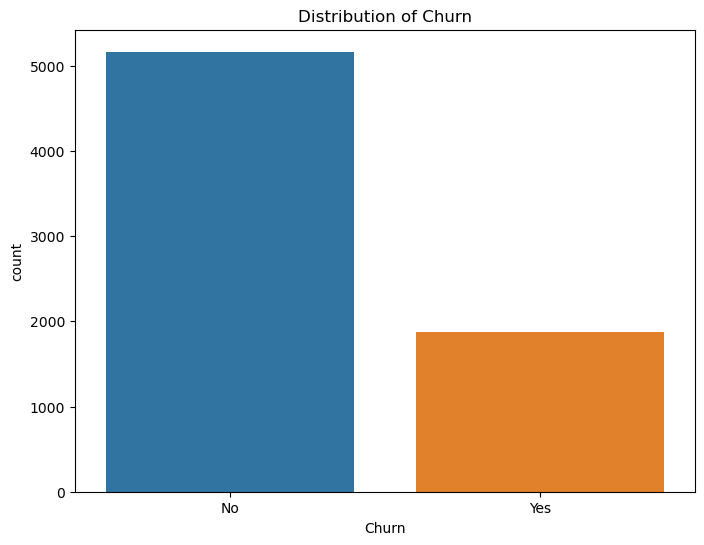

In [14]:
plt.figure(figsize=(8, 6))
#chrun distribution
sns.countplot(x='Churn', data=telco_df)
plt.title("Distribution of Churn")


From the graph, the number of customers to leave is less that the number of customer remaining

<Figure size 800x600 with 0 Axes>

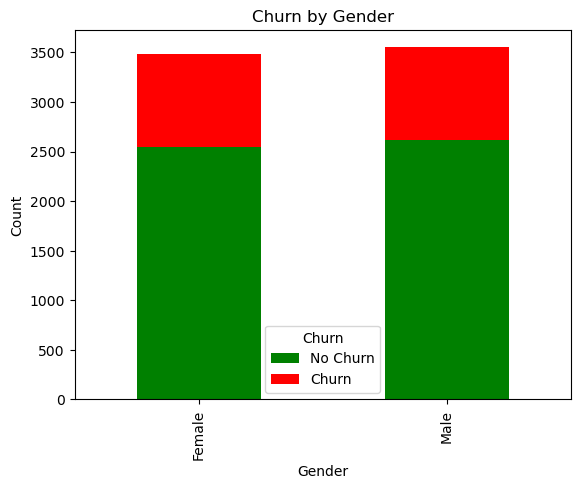

In [15]:
plt.figure(figsize=(8, 6))
# Count the occurrences of each combination of 'gender' and 'Churn'
gender_churn_counts = telco_df.groupby(['gender', 'Churn']).size().unstack()

# Plot the bar plot
ax = gender_churn_counts.plot(kind='bar', stacked=True, color=['green', 'red'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])

# Show the plot
plt.show()

From this graph the males have the highest number of those who aren't going to leave whereas for the females also same. In both genders less number of customers are going to leave

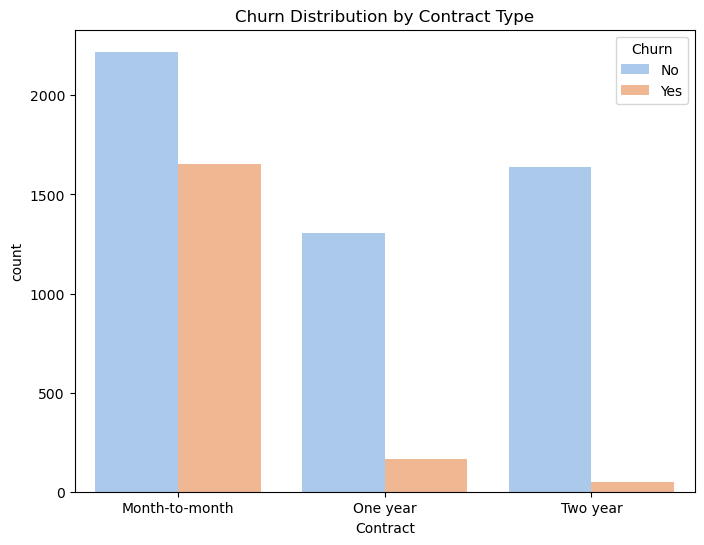

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', data=telco_df, hue='Churn', palette='pastel')
plt.title('Churn Distribution by Contract Type')
plt.show()

From the graph, contract type month to moth has the highest users but the users are also not leaving it also has highest number of customers who are going to leave as compared to one year and two year.

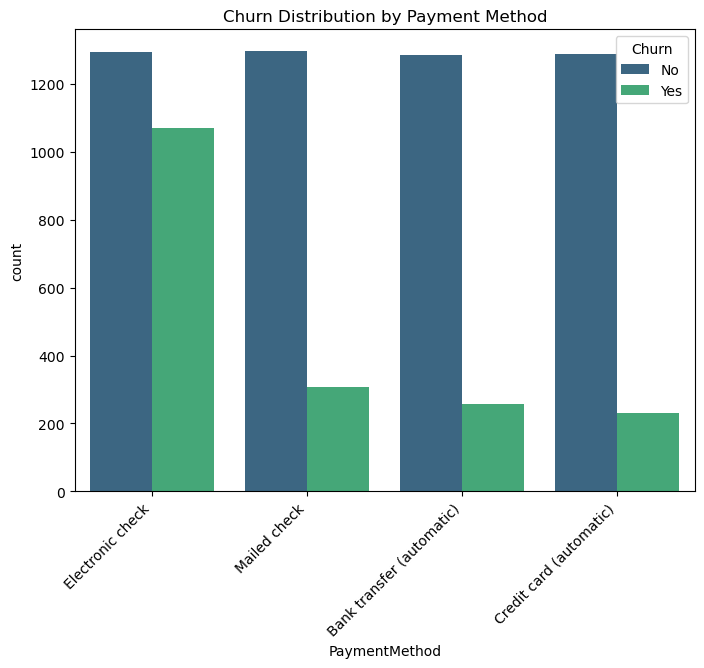

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data=telco_df, hue='Churn', palette='viridis')
plt.title('Churn Distribution by Payment Method')
plt.xticks(rotation=45, ha='right')
plt.show()

All the payment methods are used by the customers who aren't going to leave though the highest number of customers to leave are using electronic check

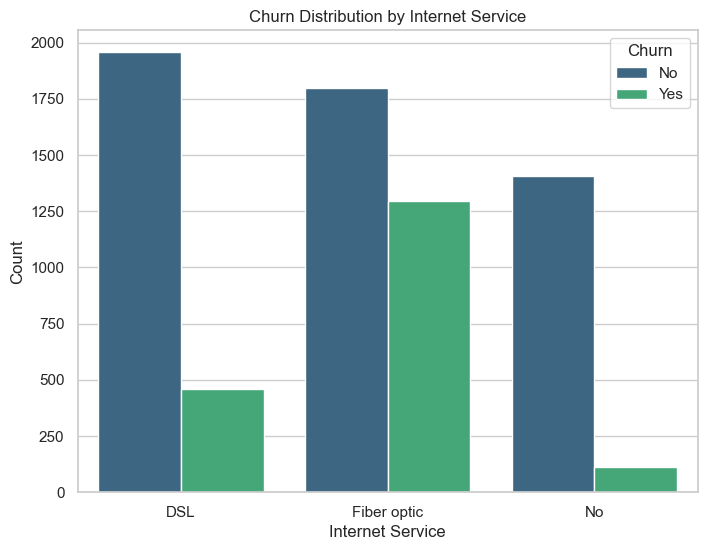

In [18]:
 
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=telco_df, palette='viridis')

plt.title('Churn Distribution by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

The most used internet service is the DSL with the highest n.o of customers who aren't leaving, the fibre optic internet service has got the highest n.o of customers to leave.

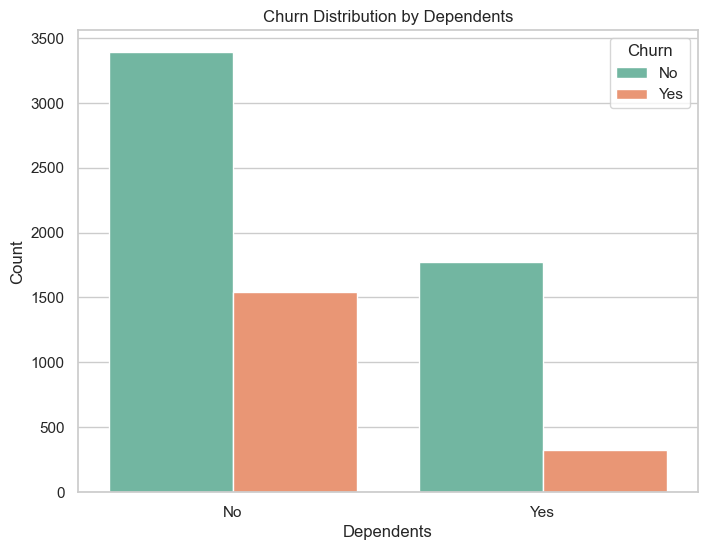

In [19]:
# Assuming 'your_dataframe' is your DataFrame
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Dependents', hue='Churn', data=telco_df, palette='Set2')

plt.title('Churn Distribution by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

Customer with no dependants gas the highest n.o of customers who aren't going to leave whereas followd by ones with yes dependants.

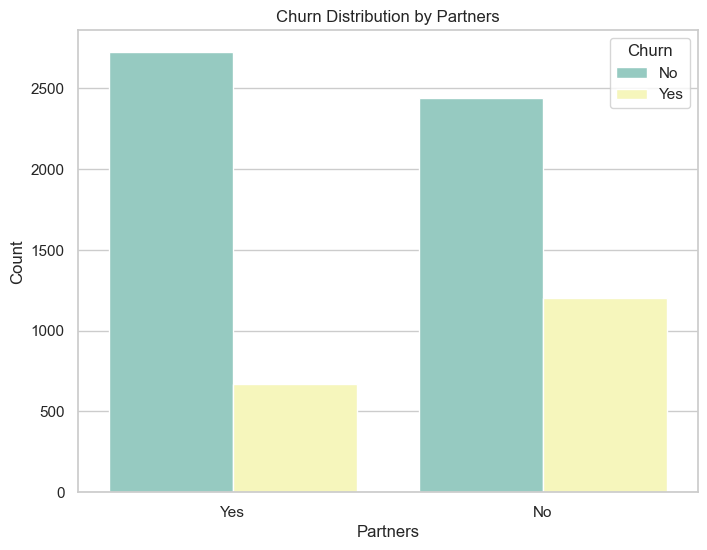

In [20]:
# Assuming 'your_dataframe' is your DataFrame
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Partner', hue='Churn', data=telco_df, palette='Set3')

plt.title('Churn Distribution by Partners')
plt.xlabel('Partners')
plt.ylabel('Count')
plt.show()

Customers with partners has the highest n.o of customers who aren't going to leave as compared to those with no partners 

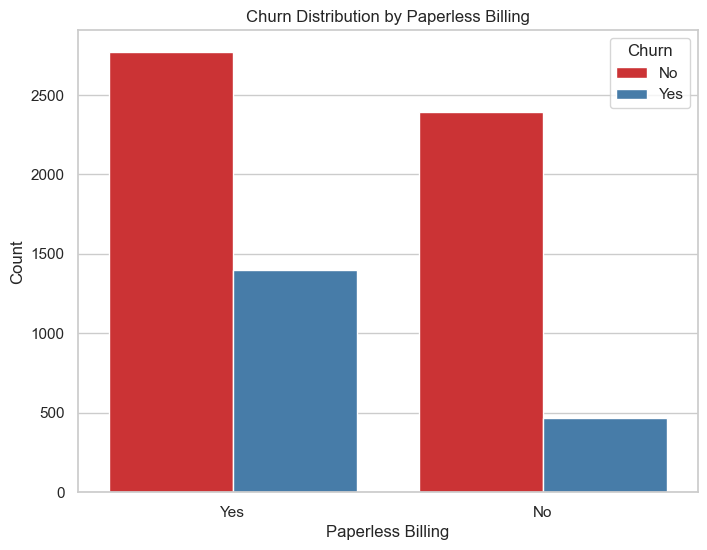

In [21]:

# Assuming 'your_dataframe' is your DataFrame
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=telco_df, palette='Set1')

plt.title('Churn Distribution by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

Paperless billing has the highest number of no churn

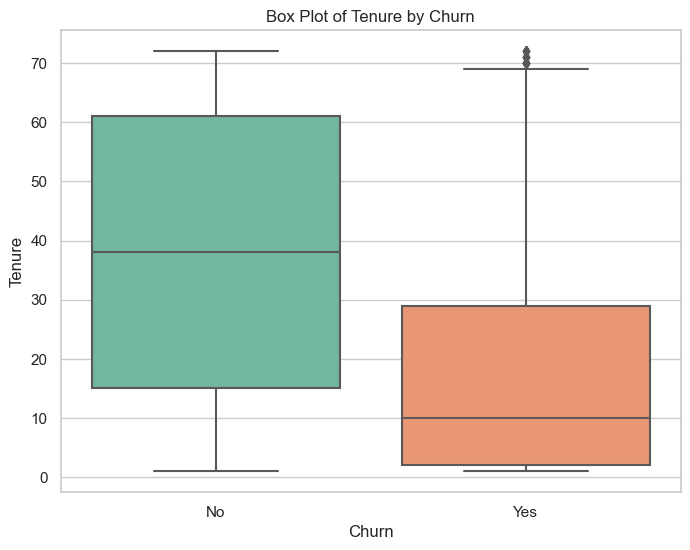

In [22]:
# Assuming 'your_dataframe' is your DataFrame
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=telco_df, palette='Set2')

plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

<b>Data Preprocessing</b>

In [23]:
telco_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [24]:
categorical_columns  = telco_df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [25]:
enc = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    telco_df[col] = enc.fit_transform(telco_df[col])


<b>Data Modelling</b>

In [26]:
X = telco_df.drop('Churn',axis=1)
y = telco_df['Churn']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y) 

In [28]:
numeric_columns = ['tenure','MonthlyCharges', 'TotalCharges' ]

scaler = StandardScaler()

telco_df = pd.DataFrame(scaler.fit_transform(telco_df[numeric_columns].astype('float')), columns=numeric_columns)
telco_df

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [29]:
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


<b>RandomForest</b>

In [39]:
#tune the model
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

#clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best parameters:", best_params)
print("Tuned model accuracy:", accuracy)
print("Tuned model classification report:\n", report)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Tuned model accuracy: 0.7867803837953091
Tuned model classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



Accuracy:
This is the proportion of correctly classified instances among all instances (both true positives and true negatives). In this case, the tuned model achieves an accuracy of approximately 78.68
Precision, Recall, and F1-Score:
Class 0 (No Churn):

Precision (Positive Predictive Value): 0.83
Out of all instances predicted as "No Churn," 83% are actually "No Churn."
Recall (Sensitivity, True Positive Rate): 0.90
Out of all instances that are actually "No Churn," 90% are correctly predicted by the model.
F1-Score: 0.86
The harmonic mean of precision and recall, providing a balance between the two.
Class 1 (Churn):

Precision (Positive Predictive Value): 0.63
Out of all instances predicted as "Churn," 63% are actually "Churn."
Recall (Sensitivity, True Positive Rate): 0.48
Out of all instances that are actually "Churn," 48% are correctly predicted by the model.
F1-Score: 0.55
The harmonic mean of precision and rec

The model performs better in predicting "No Churn" (Class 0) compared to "Churn" (Class 1). This is evident from higher precision, recall, and F1-score for Class 0.
The weighted average provides an overall assessment, considering the class imbalance. The model achieves a balanced performance with a weighted average F1-score of approximately 0.78.all for Class 1.

<b>Logistic Regression</b>

In [33]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("The accuracy score is :", accuracy)
print("The classification report is :", report)

The accuracy score is : 0.7931769722814499
The classification report is :               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



Precision, Recall, and F1-Score:
Class 0 (No Churn):

Precision: 0.85
Out of all instances predicted as "No Churn," 85% are actually "No Churn."
Recall: 0.88
Out of all instances that are actually "No Churn," 88% are correctly predicted by the model.
F1-Score: 0.86
The harmonic mean of precision and recall for Class 0.
    
#Class 1 (Churn):

Precision: 0.62
Out of all instances predicted as "Churn," 62% are actually "Churn."
Recall: 0.56
Out of all instances that are actually "Churn," 56% are correctly predicted by the model.
F1-Score: 0.59
The harmonic mean of precision and recall for Class 1.

The model performs reasonably well, with good accuracy and a balanced F1-score for both classes.
It has a higher precision and recall for Class 0 ("No Churn") compared to Class 1 ("Churn").
The weighted average F1-score is approximately 0.79, indicating a good overall performance considering class imbalance.

<b>Gradient Boosting Classifier</b>

In [40]:
#tune my model
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

GB =  GradientBoostingClassifier(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(GB, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_GB = grid_search.best_estimator_


#GB.fit(X_train, y_train)

y_pred =best_GB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best parameters:", best_params)
print("Tuned model accuracy:", accuracy)
print("Tuned model classification report:\n", report)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Tuned model accuracy: 0.7981520966595593
Tuned model classification report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



Accuracy: The model correctly classifies approximately 79.82% of instances in the test set.

Precision, Recall, and F1-Score:
Class 0 (No Churn):

Precision: 0.84
Out of all instances predicted as "No Churn," 84% are actually "No Churn."
Recall: 0.89
Out of all instances that are actually "No Churn," 89% are correctly predicted by the model.
F1-Score: 0.87
The harmonic mean of precision and recall for 

Class 1 (Churn):

Precision: 0.65
Out of all instances predicted as "Churn," 65% are actually "Churn."
Recall: 0.53
Out of all instances that are actually "Churn," 53% are correctly predicted by the model.
F1-Score: 0.58
The harmonic mean of precision and recall for C

The tuned Gradient Boosting Classifier shows improved accuracy compared to the untuned model.
The model provides a better balance between precision and recall for both classes.
The weighted average F1-score is approximately 0.79, indicating a good overall performance considering class imbalance.lass 1.Class 0.all for Class 1.

<b>Recommendations</b>

Implement continuous monitoring of customer behavior. Regularly reevaluate the model's accuracy and recalibrate it if necessary. Customer preferences and behaviors may change over time hence requiring monitoring.

Communicate with customers transparently about changes in services, pricing, or any other factors that might influence their decision to stay or leave. Open communication can build trust and loyalty. You are to consider the customers satisfaction towards the services offered.

Develop targeted customer retention programs based on the analysis of customer segments. Tailor these programs to address the unique needs and preferences of different customer groups.